# Projet 6 : Analyse des ventes d'une librairie en ligne 

## Partie 1 : Import et nettoyage de données 

### 1. Import unique des librairies utilisées tout au long du notebook et première exploration des différentes tables

#### Import des librairies

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from dateutil.parser import parse
from datetime import datetime
from scipy.stats import spearmanr
import scipy.stats as st


#### Import et première explotation des données

In [2]:
d_customer = pd.read_csv("customers.csv", sep=",")

In [3]:
d_product = pd.read_csv("products.csv", sep=",")

In [4]:
d_transaction = pd.read_csv("transactions.csv", sep=",")

In [5]:
d_transaction.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [6]:
d_product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [7]:
d_customer.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_1021,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


**Table customer.**

les principales informations à tirer des résultats en première approche : 
- a priori pas d'erreurs ou valeurs abbérantes
- le client le plus agé est né en 1929, le plus jeune 2004 
- les 3/4 des clients sont nés avant 1992 
- l'age moyen est de 43 ans. 
- les clients sont majoritairement des femmes à 52%. 

La table ne contient pas de doublons :  
- 8623 id différents et chaque colonne contient le même nombre de valeur donc pas de valeurs vides.



In [8]:
d_product.describe(include = 'all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_952,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


**Table produit.**

En première approche : 
- Pas de valeur vide, 3287 valeurs pour chaque variable. 
- Pas de doublons non plus, 3287 et 3287 id différents. 

Quelques interrogations à creuser: 
- La variable price comprend une valeur minimum de -1 euros ce qui est impossible.
- La variable categ comprend 3 modalités comprises entre 0 et 2.



In [9]:
d_transaction.describe(include = "all")

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


**Table transaction.** 


En première approche, sur la forme : 
- Pas de valeurs vides.
- Le format date est à revoir car inexploitable en l'espèce.
- La date test_2021-03-01 02:30:02.237413 laisse entendre que certains éléments seront à écarter lors des analyses.
- Vérifier les doublons au niveau de la variable session_id, avec une modalité qui apparait 200 fois. 

En première approche, sur le fond : 
- Le produit le plus vendu est la référence 1_369.
- Le client c_1609 a acheté à lui seul 25488 livres. 



### Vérification de la variable session_id de la table transaction 

- On cherche à isoler les valeurs doublons

In [10]:
# je cherche à classer les session_id par ordre d'occurence décroissante 
d_transaction.groupby(['session_id']).size().sort_values(ascending = False)

session_id
s_0         200
s_118668     14
s_21005      13
s_96857      13
s_179575     13
           ... 
s_42551       1
s_66775       1
s_212623      1
s_298531      1
s_343318      1
Length: 342316, dtype: int64

In [11]:
# je cherche à exposer les doublons grâce à la méthode duplicated
d_transaction[d_transaction.duplicated()].sort_values(by="date")

,id_prod,date,session_id,client_id
606326,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
453857,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
548383,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
255856,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
...,...,...,...,...
379783,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
633911,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
320833,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
621687,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1


In [12]:
d_transaction[d_transaction.duplicated()].describe()

,id_prod,date,session_id,client_id
count,126,126,126,126
unique,1,36,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,126,11,126,69


#### Conclusion 

- La selection par valeur doublon laisse apparaitre des transactions "test" qui doivent être sorties des analyses futures.

### Focus sur le client c_1609 qui a plus de 25000 achats

- On cherche à vérifier qu'il ne s'agit pas d'une erreur

In [13]:
# Selection du client c_1609 dans la table transaction
d_transaction[d_transaction['client_id'] == 'c_1609'].sort_values(by="date")

,id_prod,date,session_id,client_id
524575,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609
256738,0_1159,2021-03-01 00:11:57.832228,s_7,c_1609
583474,0_1425,2021-03-01 01:56:41.944044,s_46,c_1609
423844,0_1469,2021-03-01 02:12:21.294004,s_53,c_1609
209992,1_406,2021-03-01 02:41:13.649521,s_63,c_1609
...,...,...,...,...
424085,1_735,2023-02-28 21:42:40.632842,s_348401,c_1609
148054,0_1594,2023-02-28 22:04:16.664518,s_348409,c_1609
584950,0_1940,2023-02-28 22:09:50.559145,s_348409,c_1609
444949,0_1002,2023-02-28 22:27:00.464046,s_348409,c_1609


In [14]:
# Selection du client c_1609 dans la table customer afin de vérifier ses données. 
# Je cherche à vérifier qu'il ne s'agit pas d'un client test notamment.
d_customer[d_customer['client_id'] == 'c_1609']

,client_id,sex,birth
3642,c_1609,m,1980


In [15]:
# je procède à un classement du nombre d'achat par client pour vérifier si d'autres clients 
# ont un profil d'achat similaire
d_transaction.groupby(['client_id']).size().sort_values(ascending = False).head(15)


client_id
c_1609    25488
c_6714     9187
c_3454     6773
c_4958     5195
c_3263      403
c_2140      402
c_2595      398
c_2077      384
c_1637      380
c_7421      379
c_8026      377
c_760       375
c_5953      374
c_1422      374
c_8510      373
dtype: int64

<AxesSubplot:>

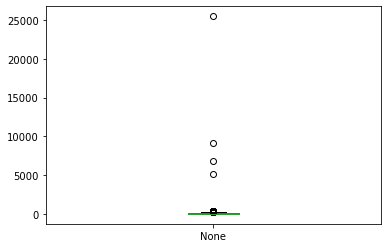

In [16]:
# Je cherche à visualiser les outliers avec un box plot
d_transaction.groupby(['client_id']).size().sort_values(ascending = False).plot.box()


In [17]:
# Je selectionne spécifiquement le client c_1609
client_c_1609 = d_transaction[d_transaction['client_id'] == 'c_1609'].sort_values(by="date")

In [18]:
# j'applique la méthode d'aggrégation groupby afin d'obtenir le classement des produits acheté par le client
client_c_1609.groupby(['id_prod']).size().sort_values(ascending = False)

id_prod
0_1438    95
0_1360    79
0_1334    78
0_1424    75
0_1411    73
          ..
0_1711     1
0_1721     1
1_40       1
0_534      1
2_46       1
Length: 1920, dtype: int64

<AxesSubplot:ylabel='Frequency'>

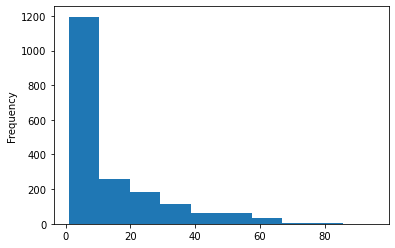

In [19]:
# je visualise la distribution des achats effectués par le client c_1609 
client_c_1609.groupby(['id_prod']).size().sort_values(ascending = False).plot.hist()

#### Conclusion 

- Le client c_1609 n'est visiblement par un client test.
- Peut être un grossiste ? 
- A noter 4 clients dont le nombre d'achats est supérieur à 5000 livres. 

## 2. Nettoyage des données 

### Formatage global des nombres floats

- On cherche à éviter l'écriture scientifique sur les grands nombres

In [20]:
pd.set_option ('display.float_format', lambda x: '% .3f'% x)

### Création d'une table alternative transaction 2 sans les sessions en doublons soit les sessions s_0

- On cherche à créer une table de travail qui ne comprend pas les modalités de test ainsi que les doublons

In [21]:
# je sélectionne la session s_0 et affiche ses principales caractéristiques
d_transaction[d_transaction['session_id'] == 's_0'].describe(include = 'all')

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


In [22]:
#suppression de la session s_0

index_name = d_transaction[d_transaction['session_id'] == 's_0'].index

d_transaction_2 = d_transaction.drop(index_name)

d_transaction_2[d_transaction_2['client_id'] == 'ct_0']

d_transaction_2

d_transaction

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


### Travail sur le format date

- On cherche à rendre les dates exploitables et à définir de nouvelles colonnes comprenant isolément, le jour, le mois, l'année... afin de procéder à nos analyses futures

In [23]:
# Création de la variable datetime, résultat de la conversion de la colonne date au format datetime
d_transaction_2['datetime'] = pd.to_datetime(d_transaction_2["date"])

In [24]:
# Création des colonnes year, month, day, jour, mois 
d_transaction_2['year'] = pd.DatetimeIndex(d_transaction_2['datetime']).year 

d_transaction_2['month'] = pd.DatetimeIndex(d_transaction_2['datetime']).month 

d_transaction_2['day'] = pd.DatetimeIndex(d_transaction_2['datetime']).day 

d_transaction_2['jour']=d_transaction_2['datetime'].apply(lambda x : x.strftime('%Y-%m-%d'))

d_transaction_2['mois']=d_transaction_2['datetime'].apply(lambda x : x.strftime('%Y-%m'))

In [25]:
d_transaction_2

,id_prod,date,session_id,client_id,datetime,year,month,day,jour,mois
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20 13:21:29.043970,2022,5,20,2022-05-20,2022-05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02 07:55:19.149409,2022,2,2,2022-02-02,2022-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18 15:44:33.155329,2022,6,18,2022-06-18,2022-06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24 04:19:29.835891,2021,6,24,2021-06-24,2021-06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11 08:22:08.194479,2023,1,11,2023-01-11,2023-01
...,...,...,...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15 13:05:06.246925,2022,1,15,2022-01-15,2022-01
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19 16:03:23.429229,2022,3,19,2022-03-19,2022-03
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20 04:33:37.584749,2022,12,20,2022-12-20,2022-12
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16 20:36:35.350579,2021,7,16,2021-07-16,2021-07


### Création de la colonne vente 

- On cherche à créer une nouvelle colonne vente qui permettra de compter facilement le nombre de ventes effectuées lors d'un groupement. 

In [26]:
d_transaction_2['vente'] = 1 

### Verification des correspondances Id avant jointures

- La phase d'analyse des données nécessite une la réalisation de jointures entre les tables customer, product et transaction. 
- Il convient au préalable de vérifier que les id présents dans la table de jointure le soit également dans la table jointe. 

#### Tables transaction et product

In [27]:
# je créé un set comprenant les id_prod de la table transaction
# je créé un set comprenant les id_prod de la table product
# je soustrai ces deux sets afin de vérifier quels produits se trouvent dans product et non dans transaction

prod_id_dt_trans = set(d_transaction_2['id_prod'])

prod_id_dt_prod = set(d_product['id_prod'])

prod_id_dt_prod - prod_id_dt_trans

{'0_1014',
 '0_1016',
 '0_1025',
 '0_1062',
 '0_1119',
 '0_1318',
 '0_1620',
 '0_1624',
 '0_1645',
 '0_1780',
 '0_1800',
 '0_2308',
 '0_299',
 '0_310',
 '0_322',
 '0_510',
 '1_0',
 '1_394',
 '2_72',
 '2_86',
 '2_87',
 'T_0'}

#### Conclusion 

- On trouve ces références dans les produits mais pas dans la table transaction. 
- Ce n'est pas forcément anormal, simplement, ces produits bien référencés n'ont pas fait l'objet de transactions jusqu'à présent. 

In [28]:
# je soustrai le set trans et prod afin de vérifier quels produits 
# se trouvent dans transaction et non dans product
prod_id_dt_trans - prod_id_dt_prod

{'0_2245'}

#### Conclusion 

- Plus anormal, le produit 0_2245 se trouve dans la table transaction mais n'est pas référencé comme produit. 
- Ce produit n'aura pas de prix associé, 
- Sans information supplémentaire du service marketing, je devrais l'enlever lors de la jointure.

####  Tables transaction et customer

In [29]:
client_id_dt_trans = set(d_transaction_2['client_id'])

client_id_d_customer = set(d_customer['client_id'])

client_id_dt_trans - client_id_d_customer

set()

In [30]:
(client_id_d_customer - client_id_dt_trans)

len(client_id_d_customer - client_id_dt_trans)

23

#### Conclusion :

- Pas de problèmes pour le client_id. 
- Aucun client non référencé ne se trouve dans la table transaction 
- 23 clients se sont inscrits sans effectuer d'achat.  

## 3. Jointures des tables customer, product et transaction en la table finale d'analyse d_jfi

- On cherche à produire une table unique à partir de laquelle les analyses concernant le chiffre d'affaires et autres KPI (key performance indicators) seront déduits.

###  Création de la table de jointure inner

- Je préfère recourir aux jointures internes et filtrer ainsi les clients et produits n'ayant pas fait l'objets d'une transaction. 
- Ce sera plus simple pour les analyses et ces derniers n'apportent finalement que peu d'informations. 

In [31]:
# table de jointure intermédaire entre transaction et customer 
d_tc_i = pd.merge(d_transaction_2,d_customer, on = "client_id", how="inner")

#table de jointure finale prenant la table intermédiaire et la table product
d_jfi = pd.merge(d_tc_i, d_product, on = "id_prod", how='inner')

d_jfi.head(5)

,id_prod,date,session_id,client_id,datetime,year,month,day,jour,mois,vente,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20 13:21:29.043970,2022,5,20,2022-05-20,2022-05,1,f,1986,4.180,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07-20 13:21:29.043970,2021,7,20,2021-07-20,2021-07,1,f,1986,4.180,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08-20 13:21:29.043970,2022,8,20,2022-08-20,2022-08,1,f,1986,4.180,0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,2021-05-09 11:52:55.100386,2021,5,9,2021-05-09,2021-05,1,f,1968,4.180,0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,2022-05-30 01:17:07.487046,2022,5,30,2022-05-30,2022-05,1,f,1968,4.180,0


In [32]:
# le client ct_0 n'apparait pas du fait de la jointure interne, c'est normal il s'agissait d'un client test
d_jfi[d_jfi["client_id"] == "ct_0"]

,id_prod,date,session_id,client_id,datetime,year,month,day,jour,mois,vente,sex,birth,price,categ


# PARTIE 2 : Analyse du chiffre d'affaire (CA) dans le temps

## Création de la colonne chiffre d'affaire 

- Le chiffre d'affaire est le produit du prix d'un produit par le nombre de ses ventes

In [33]:
d_jfi["CA"] = d_jfi["price"]*d_jfi["vente"]

In [34]:
d_jfi

,id_prod,date,session_id,client_id,datetime,year,month,day,jour,mois,vente,sex,birth,price,categ,CA
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20 13:21:29.043970,2022,5,20,2022-05-20,2022-05,1,f,1986,4.180,0,4.180
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07-20 13:21:29.043970,2021,7,20,2021-07-20,2021-07,1,f,1986,4.180,0,4.180
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08-20 13:21:29.043970,2022,8,20,2022-08-20,2022-08,1,f,1986,4.180,0,4.180
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,2021-05-09 11:52:55.100386,2021,5,9,2021-05-09,2021-05,1,f,1968,4.180,0,4.180
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,2022-05-30 01:17:07.487046,2022,5,30,2022-05-30,2022-05,1,f,1968,4.180,0,4.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679106,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,2023-01-26 06:52:02.225335,2023,1,26,2023-01-26,2023-01,1,m,1945,35.240,1,35.240
679107,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,2022-11-26 06:52:02.225335,2022,11,26,2022-11-26,2022-11,1,m,1945,35.240,1,35.240
679108,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,2021-09-26 06:52:02.225335,2021,9,26,2021-09-26,2021-09,1,m,1945,35.240,1,35.240
679109,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,2022-02-19 14:51:58.078656,2022,2,19,2022-02-19,2022-02,1,m,1993,86.990,2,86.990


## Calcul du chiffre d'affaire total 

In [35]:
CA_total = d_jfi['CA'].sum()

CA_total

11853728.680000002

### Conclusion :

- Le chiffre d'affaire total est de 11 853 728.68 euros 

## Evolution du CA dans le temps 

- On cherche à montrer comment le CA evolue au fil du temps

### Evolution du chiffre d'affaires par jour

In [36]:
# Je crée t, la table qui aggrège les CA par jour 
t = d_jfi['CA'].groupby(d_jfi['jour'])

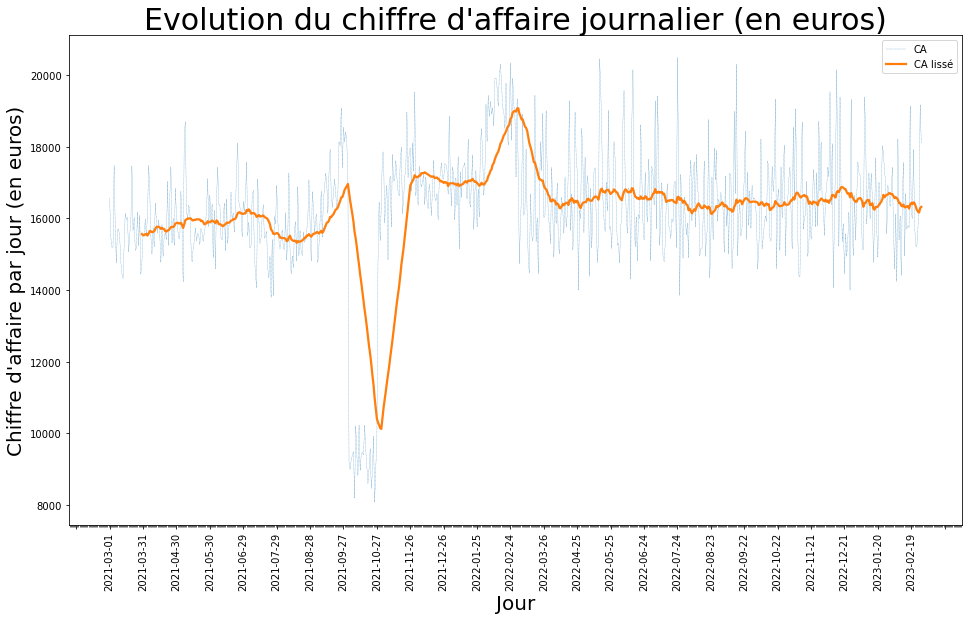

In [37]:
# graphique de l'évolution du chiffre d'affaires journalier en euros
plt.figure(figsize=(16,9))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.plot(d_jfi.pivot_table(values='CA',index='jour', aggfunc=sum), linestyle = 'dashed', linewidth=0.25, label = 'CA')
#rajout de la courbe des moyenne mobile à 30 jour pour lisser le CA
plt.plot(d_jfi.pivot_table(values='CA',index='jour', aggfunc=sum).rolling(30).mean(), linestyle="solid", linewidth=2.25, label='CA lissé')
plt.title("Evolution du chiffre d'affaire journalier (en euros)", fontsize= 30)
plt.xlabel('Jour', fontsize = 20)
plt.ylabel("Chiffre d'affaire par jour (en euros)", fontsize = 20)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

#### Conclusion 

- Perception très nette une chute du CA durant le mois d'octobre 2021
- Necessaire investigation sur le mois d'octobre

### Focus sur le mois d'octobre 2021

- On cherche à comprendre ce qui aurait pu expliquer cette chute du CA au mois d'octobre 2021
- On sélectionne la période du mois d'octobre
- On génère ensuite un dataframme (df) sur la même période avec les 4 plus gros clients 
- On compare graphiquement le CA total par jour et le CA par jour des 4 plus gros clients.
- On cherche à voir si la chute du CA est due au non achat des plus gros clients sur la période

In [38]:
# création du dataframme (df) octobre qui est le résultat du filtre des valeurs uniquement sur la période 
# comprise entre le "2021-09-25" et le "2021-11-06"
df_octobre= d_jfi.loc[d_jfi['jour'].between("2021-09-25","2021-11-06")]

In [39]:
# liste des 4 plus gros clients du site  
client = ['c_1609','c_6714','c_3454','c_4958']

In [40]:
# df des ventes effectuées uniquement par les 4 plus gros clients
df_octobre_CA = df_octobre[df_octobre.client_id.isin(client)]

In [41]:
df_octobre_CA.head(5)

,id_prod,date,session_id,client_id,datetime,year,month,day,jour,mois,vente,sex,birth,price,categ,CA
6,0_1518,2021-10-23 21:58:50.700370,s_109153,c_6714,2021-10-23 21:58:50.700370,2021,10,23,2021-10-23,2021-10,1,f,1968,4.180,0,4.180
27,0_1518,2021-10-13 18:00:08.691379,s_104281,c_1609,2021-10-13 18:00:08.691379,2021,10,13,2021-10-13,2021-10,1,m,1980,4.180,0,4.180
31,0_1518,2021-10-18 05:08:38.451377,s_106465,c_1609,2021-10-18 05:08:38.451377,2021,10,18,2021-10-18,2021-10,1,m,1980,4.180,0,4.180
709,0_1627,2021-10-09 16:19:37.271444,s_102343,c_1609,2021-10-09 16:19:37.271444,2021,10,9,2021-10-09,2021-10,1,m,1980,3.990,0,3.990
715,0_1627,2021-10-14 05:43:00.248719,s_104506,c_1609,2021-10-14 05:43:00.248719,2021,10,14,2021-10-14,2021-10,1,m,1980,3.990,0,3.990


In [42]:
# Création de y le df qui aggrège le CA par jour sur la période d'octobre
y = df_octobre['CA'].groupby(df_octobre['jour'])

In [43]:
y.sum()

jour
2021-09-25    19080.290
2021-09-26    17419.290
2021-09-27    18542.390
2021-09-28    18136.650
2021-09-29    18410.710
2021-09-30    18128.010
2021-10-01    17058.340
2021-10-02     9182.130
2021-10-03     8993.050
2021-10-04     9279.680
2021-10-05     9390.460
2021-10-06     9490.690
2021-10-07     8191.080
2021-10-08    10207.350
2021-10-09     9425.360
2021-10-10     8825.650
2021-10-11    10230.560
2021-10-12     8971.150
2021-10-13     9427.220
2021-10-14     9469.780
2021-10-15     9398.830
2021-10-16    10229.020
2021-10-17     9557.980
2021-10-18     9083.720
2021-10-19     8601.710
2021-10-20     9021.190
2021-10-21     9571.790
2021-10-22     8467.860
2021-10-23     8910.640
2021-10-24     9923.190
2021-10-25     8076.040
2021-10-26     9020.790
2021-10-27     9789.530
2021-10-28    14758.420
2021-10-29    16453.630
2021-10-30    15386.780
2021-10-31    16405.120
2021-11-01    17810.010
2021-11-02    17854.720
2021-11-03    15875.140
2021-11-04    16512.380
2021-11-05 

In [44]:
# Création de z, le df qui aggrège le CA par jour sur la période d'octobre pour les 4 plus gros clients

z = df_octobre_CA.groupby('jour')['CA'].sum()

In [45]:
z

jour
2021-09-25    1263.730
2021-09-26    1000.280
2021-09-27    1455.570
2021-09-28    1352.650
2021-09-29    1310.730
2021-09-30    1299.510
2021-10-01    1368.160
2021-10-02     801.630
2021-10-03     934.060
2021-10-04     746.440
2021-10-05     288.280
2021-10-06     666.280
2021-10-07     543.020
2021-10-08     708.860
2021-10-09    1076.140
2021-10-10     711.760
2021-10-11     727.690
2021-10-12     563.650
2021-10-13     604.460
2021-10-14     766.650
2021-10-15     614.940
2021-10-16     800.690
2021-10-17     534.560
2021-10-18     725.670
2021-10-19    1205.260
2021-10-20     723.390
2021-10-21     526.310
2021-10-22     830.410
2021-10-23     879.760
2021-10-24     663.750
2021-10-25     411.750
2021-10-26     986.480
2021-10-27     459.430
2021-10-28    1073.800
2021-10-29    1118.330
2021-10-30    1217.930
2021-10-31     790.850
2021-11-01    1675.780
2021-11-02    1147.510
2021-11-03     859.560
2021-11-04    1314.810
2021-11-05    1358.340
2021-11-06    1207.270
Name: 

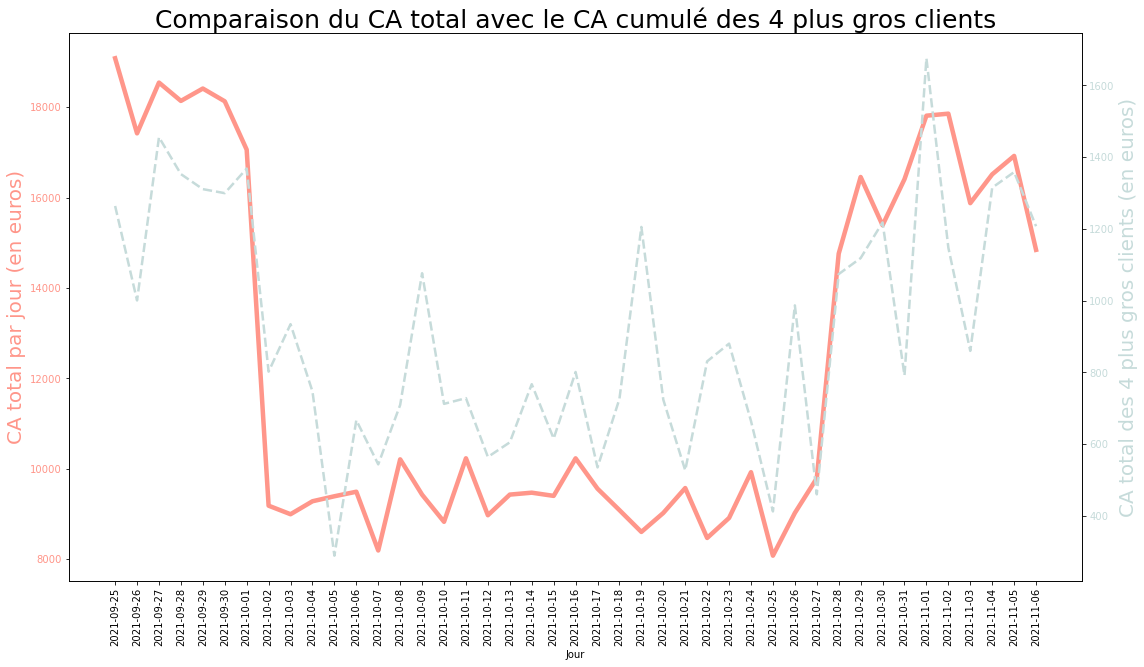

In [46]:
# Graphique de comparaison du CA total avec le CA cumulé des 4 plus gros clients

fig,ax1 = plt.subplots(figsize=(16,9))
color = '#FF968A'
ax1.set_xlabel('Jour')
ax1.set_ylabel('CA total par jour (en euros)', color=color, fontsize = 20)
ax1.plot(y.sum(), color=color, linewidth=4.5)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#C6DBDA'
ax2.set_ylabel('CA total des 4 plus gros clients (en euros)', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot(z, color=color, linestyle = 'dashed', linewidth=2.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Comparaison du CA total avec le CA cumulé des 4 plus gros clients", fontsize=25)
plt.show()

#### Conclusion :

- Il apparait que les 4 plus gros clients ont continué leurs achats durant la période d'octobre malgré une baisse importante dès le premier jour d'octobre
- Le zoom montre bien une chute du CA qui est divisé par 2 entre octobre et novembre 2021

## CA moyen par jour 

- On cherche à obtenir le chiffre d'affaire moyen par jour et non plus le chiffre d'affaire total

In [47]:
t.mean().describe()

count    730.000
mean      17.512
std        1.438
min       13.037
25%       16.666
50%       17.551
75%       18.509
max       21.139
Name: CA, dtype: float64

In [48]:
# Obtention des CA moyen par jour et tri ascendant
t.mean().sort_values()

jour
2021-10-06    13.037
2021-10-07    13.148
2021-10-03    13.245
2021-10-02    13.327
2021-10-12    13.531
               ...  
2023-01-29    20.785
2021-07-29    20.785
2021-07-02    20.820
2023-01-02    20.820
2021-07-12    21.139
Name: CA, Length: 730, dtype: float64

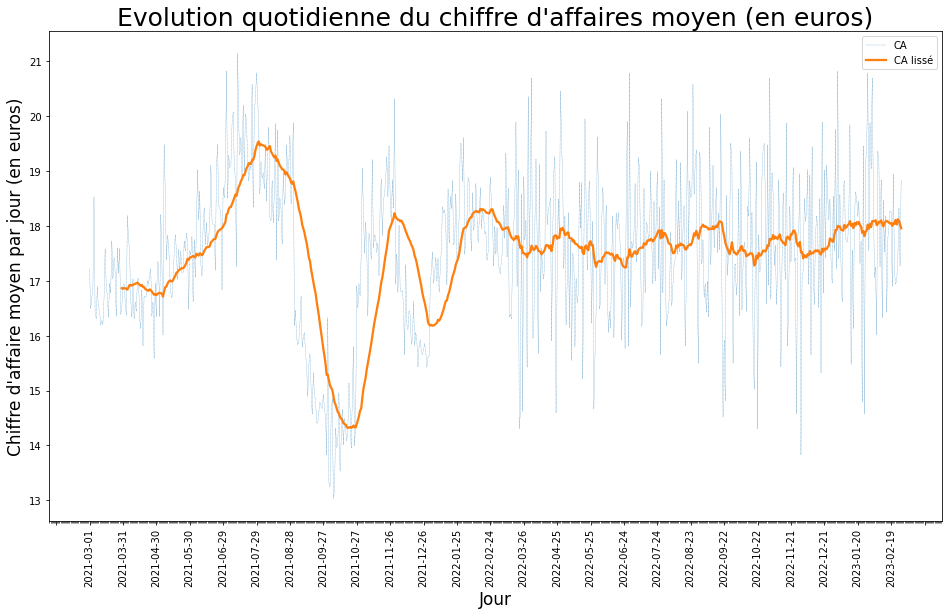

In [49]:
#Graphique de l'évolution quotidienne du chiffre d'affaires moyen en euros

plt.figure(figsize=(16,9))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.plot(d_jfi.pivot_table(values='CA',index='jour'), linestyle = 'dashed', linewidth=0.25, label= "CA")
plt.plot(d_jfi.pivot_table(values='CA',index='jour').rolling(30).mean(), linestyle="solid", linewidth=2.25,label="CA lissé")
plt.xlabel('Jour',fontsize=17)
plt.ylabel("Chiffre d'affaire moyen par jour (en euros)", fontsize=17)
plt.xticks(rotation = 90)
plt.title("Evolution quotidienne du chiffre d'affaires moyen (en euros)", fontsize=25)
plt.legend()
plt.show()

#### Conclusion :

- Constat d'une chute sur le mois d'octobre 2021 lorsqu'il est question du CA moyen par jour.

### CA moyen et CA total par année

- On cherche à comparer le CA total par an au CA moyen

In [50]:
# Group by CA total par an
CA_a = d_jfi['CA'].groupby(d_jfi['year'])

In [51]:
# pivot table du CA total par an
q= d_jfi.pivot_table(values='CA',index='year', aggfunc=sum).reset_index()

In [52]:
q

,year,CA
0,2021,4770826.560
1,2022,6108681.810
2,2023,974220.310


In [53]:
# CA moyen par an
CA_a.mean()

year
2021    17.146
2022    17.636
2023    17.881
Name: CA, dtype: float64

In [54]:
year_d= q.year

In [55]:
CA_d=q.CA

In [56]:
# serie du CA par an , sert pour l'axe y du graphique 
CA_d

0    4770826.560
1    6108681.810
2     974220.310
Name: CA, dtype: float64

In [57]:
# serie des année, sert pour l'axe x du graphique 
year_d

0    2021
1    2022
2    2023
Name: year, dtype: int64

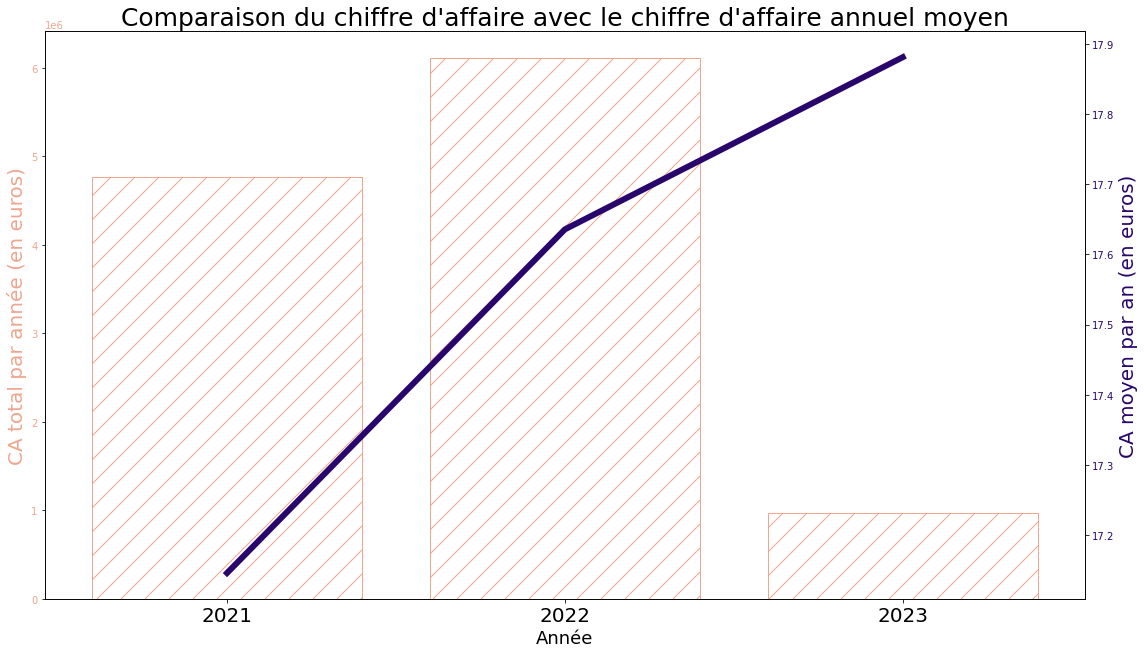

In [58]:
fig,ax1 = plt.subplots(figsize=(16,9))

color = '#F0A58F'
ax1.set_xlabel('Année', fontsize=18)
ax1.set_ylabel('CA total par année (en euros)', color=color, fontsize = 20)
ax1.bar(year_d,CA_d, edgecolor="#F0A58F", hatch= "/",color="None" )
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(fontsize=20)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#29066B'
ax2.set_ylabel('CA moyen par an (en euros)', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot(d_jfi.pivot_table(values='CA',index='year'), color="#29066B", linestyle = 'solid', linewidth=6)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Comparaison du chiffre d'affaire avec le chiffre d'affaire annuel moyen", fontsize=25)
plt.show()

#### Conclusion :

- Alors que l'année 2023 connait le CA total le plus faible, c'est également l'année où le CA moyen est le plus élevé.
- Attention aux effets d'échelle, ici les CA totaux par an ne sont finalement pas calculés sur les même périodes du fait d'un manque d'information. 

## CA par mois 

- Quelques informations supplémentaires concernant l'évolution du CA par mois
- Le nombre plus limité de valeur permet d'afficher les données de manière exhaustive et d'avoir des chiffres précis.

In [59]:
CA_m = d_jfi['CA'].groupby(d_jfi['mois'])

In [60]:
CA_m.sum()

mois
2021-03    482440.610
2021-04    476109.300
2021-05    492943.470
2021-06    484088.560
2021-07    482835.400
2021-08    482284.790
2021-09    507240.680
2021-10    320798.740
2021-11    516167.730
2021-12    525917.280
2022-01    525338.990
2022-02    535571.500
2022-03    515456.530
2022-04    492998.940
2022-05    517132.600
2022-06    496016.120
2022-07    510783.120
2022-08    506467.270
2022-09    494114.530
2022-10    507917.770
2022-11    496664.940
2022-12    510219.500
2023-01    517540.550
2023-02    456679.760
Name: CA, dtype: float64

<AxesSubplot:xlabel='mois'>

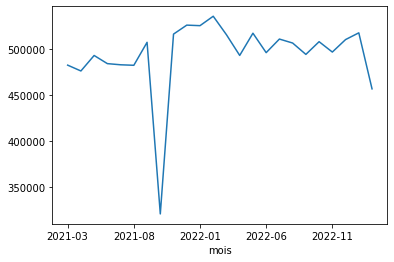

In [61]:
CA_m.sum().plot()

In [62]:
CA_m.describe()

,count,mean,std,min,25%,50%,75%,max
mois,,,,,,,,
2021-03,28601.000,16.868,17.420,0.620,8.580,13.710,18.990,300.000
2021-04,28443.000,16.739,17.946,0.620,7.990,12.990,18.580,247.220
2021-05,28285.000,17.428,19.649,0.620,8.130,13.230,18.990,300.000
2021-06,26850.000,18.029,19.127,0.620,8.990,13.990,19.440,300.000
2021-07,24738.000,19.518,21.096,0.660,9.310,14.990,20.990,247.220
2021-08,25650.000,18.803,21.548,0.620,8.960,13.990,19.418,254.440
2021-09,33314.000,15.226,14.310,0.660,7.990,12.990,17.990,247.220
2021-10,21599.000,14.852,17.780,0.620,6.990,11.030,15.990,247.220
2021-11,28311.000,18.232,17.904,0.930,9.880,14.990,20.830,254.440


#### Conclusion: 

- difficile de définir une saisonnalité dans le comportement d'achat.
- On pourrait s'attendre à un pic en période de Noël mais aucune tendance n'apparait significativement. 
- La chute du mois d'octobre 2021 se dégage encore une fois fortement


# Zoom sur les références produits

- On cherche à obtenir des informaitons sur les produits les plus vendus

## Les 20 produits au chiffre d'affaires le plus important, disctinction par année

- On cherche à comprendre quels sont les 20 produits qui ont permis de rapporter le plus d'argent à l'entreprise
- Je crée un tableau croisé dynamique pour obtenir toutes ces informations dans un tableau synthétique
- je procède ensuite à une représentation graphique

In [63]:
# Création du pivot table aggrégé par produit et année. le paramètre margins = True me permet d'avoir les totaux
CA_prod = d_jfi.pivot_table(values = ['CA'],index=['id_prod'], columns='year', aggfunc =sum, margins=True)
CA_prod.sort_values(by=("CA","All"),ascending=False).head(20)

CA                                       
year            2021         2022        2023           All
id_prod                                                    
All      4770826.560  6108681.810  974220.310  11853728.680
2_159      39563.290    47592.740    7737.470     94893.500
2_135      27389.030    36633.690    5312.230     69334.950
2_112      26149.590    32771.450    6486.720     65407.760
2_102      23242.020    31403.340    6091.420     60736.780
2_209      22746.750    29395.800    4829.310     56971.860
1_395      20524.920    29163.940    4667.390     54356.250
1_369      20319.530    28811.990    4893.960     54025.480
2_110      23219.250    26020.500    4606.500     53846.250
2_39       20180.520    27951.180    4929.150     53060.850
2_166      20703.600    26684.640    5060.880     52449.120
1_414      19421.450    27690.460    4837.490     51949.400
1_383      19887.140    27366.560    4232.540     51486.240
2_43       20507.070    25686.330    3779.460     49972.860
1_498      18812.850    27132.570    3785.940     49731.360
1_406      18136.110    25579.110    4391.370     48106.590
1_366      17837.500    25257.900    3909.980     47005.380
1_385      17985.080    24950.400    3794.540     46730.020
1_431      17969.580    24995.070    3610.710     46575.360
2_202      19933.150    21622.400    4662.330     46217.880

In [64]:
# les 20 produits au CA le plus important
CA_prod_work =CA_prod.sort_values(by=("CA","All"),ascending=False).head(20).reset_index()

In [65]:
# Série des 20 produit les plus vendus 
CA_prod_work.id_prod.iloc[1:]

1     2_159
2     2_135
3     2_112
4     2_102
5     2_209
6     1_395
7     1_369
8     2_110
9      2_39
10    2_166
11    1_414
12    1_383
13     2_43
14    1_498
15    1_406
16    1_366
17    1_385
18    1_431
19    2_202
Name: id_prod, dtype: object

In [66]:
tab_CA = CA_prod_work.CA

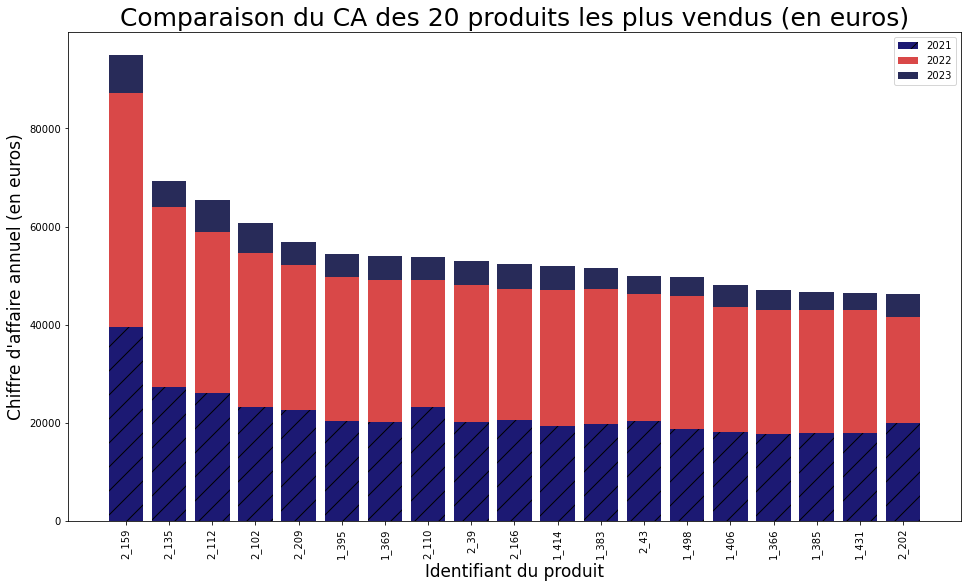

In [67]:
plt.figure(figsize=(16,9))

x=CA_prod_work.id_prod.iloc[1:] #Série des 20 produit les plus vendus
d_2021 = tab_CA.iloc[1:,0] #Liste des CA pour l'année 2021
d_2022 = tab_CA.iloc[1:,1] #Liste des CA pour l'année 2022
d_2023 = tab_CA.iloc[1:,2] #Liste des CA pour l'année 2023


plt.bar(x,d_2021,color="#1C1973", label="2021", hatch= "/")
plt.bar(x,d_2022,color="#D94848", bottom= d_2021, label="2022")
plt.bar(x,d_2023,color="#282B59", bottom= d_2021+d_2022, label="2023")

plt.title("Comparaison du CA des 20 produits les plus vendus (en euros)", fontsize= 25)
plt.xlabel('Identifiant du produit', fontsize = 17)
plt.ylabel("Chiffre d'affaire annuel (en euros)", fontsize = 17)
plt.xticks(rotation = 90)
plt.legend()
plt.show()


### Conclusion : 

- Le produit 2_159 se distingue clairement
- Le produit 2_110 est particulièrement bien vendu en 2021

### Les 20 produits les plus vendus 

In [68]:
vente_prod = d_jfi.pivot_table(values = ['vente'],index=['id_prod'], columns='year', aggfunc =sum, margins=True)

In [69]:
vente_prod.sort_values(by=("vente","All"),ascending=False).head(20)

vente                               
year           2021        2022       2023     All
id_prod                                           
All      278248.000  346380.000  54483.000  679111
1_369       847.000    1201.000    204.000    2252
1_417       832.000    1197.000    160.000    2189
1_414       815.000    1162.000    203.000    2180
1_498       805.000    1161.000    162.000    2128
1_425       786.000    1132.000    178.000    2096
1_403       731.000    1071.000    158.000    1960
1_412       740.000    1032.000    179.000    1951
1_413       748.000    1035.000    162.000    1945
1_406       731.000    1031.000    177.000    1939
1_407       749.000    1023.000    163.000    1935
1_396       739.000    1025.000    157.000    1921
1_398       758.000     998.000    161.000    1917
1_395       708.000    1006.000    161.000    1875
1_400       713.000     978.000    148.000    1839
1_392       701.000     982.000    142.000    1825
1_376       704.000     971.000    134.000    1809
1_397       680.000     947.000    172.000    1799
1_385       692.000     960.000    146.000    1798
1_388       694.000     949.000    149.000    1792

In [70]:
vente_prod_CA =vente_prod.sort_values(by=("vente","All"),ascending=False).head(20).reset_index()

In [71]:
tab_vente = vente_prod_CA.vente

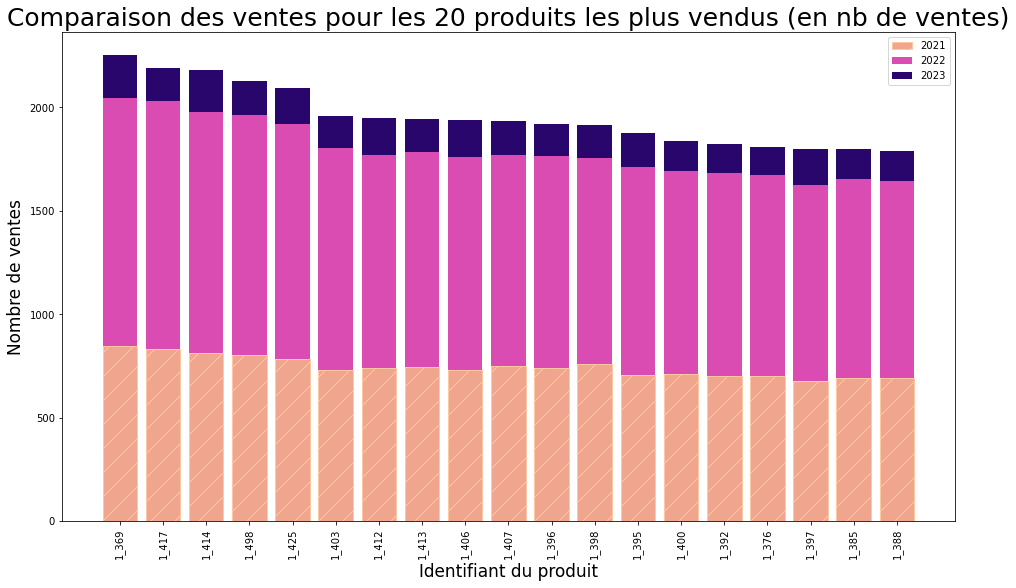

In [72]:
plt.figure(figsize=(16,9))

x=vente_prod_CA.id_prod.iloc[1:] #Série des 20 produit les plus vendus
d_2021 = tab_vente.iloc[1:,0] #Liste des ventes pour l'année 2021
d_2022 = tab_vente.iloc[1:,1] #Liste des ventes pour l'année 2022
d_2023 = tab_vente.iloc[1:,2] #Liste des ventes pour l'année 2023


plt.bar(x,d_2021,color="#F0A58F", label="2021", edgecolor="#FFC8A2", hatch= "/")
plt.bar(x,d_2022,color="#DB4CB2", bottom= d_2021, label="2022")
plt.bar(x,d_2023,color="#29066B", bottom= d_2021+d_2022, label="2023")

plt.title("Comparaison des ventes pour les 20 produits les plus vendus (en nb de ventes)", fontsize= 25)
plt.xlabel('Identifiant du produit', fontsize = 17)
plt.ylabel("Nombre de ventes", fontsize = 17)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [73]:
# je vérifie combien de références se trouvent dans mes parmi les produits les plus vendus
# et responsables du plus gros CA
set(vente_prod_CA.id_prod.iloc[1:])- set(CA_prod_work.id_prod.iloc[1:])

{'1_376',
 '1_388',
 '1_392',
 '1_396',
 '1_397',
 '1_398',
 '1_400',
 '1_403',
 '1_407',
 '1_412',
 '1_413',
 '1_417',
 '1_425'}

#### Conclusion : 

- Parmi les 20 produits les mieux vendus, seuls 7 se trouvent également par les produits avec le plus gros CA. 
- Si les produit issus de la catégorie 1 semblent se vendre mieux, leur prix plus bas ne leur permet pas de générer énormément de CA

## Le chiffre d'affaire par catégorie 

In [74]:
# Création du pivot table comprenant le CA par an selon les catégorie ainsi que le total

CA_categ = d_jfi.pivot_table(values = ['CA'],index=['categ'], columns='year',aggfunc = sum,  margins=True)

CA_categ

CA                                       
year          2021         2022        2023           All
categ                                                    
0      1883020.450  2192970.460  343740.060   4419730.970
1      1777995.850  2485275.190  390451.650   4653722.690
2      1109810.260  1430436.160  240028.600   2780275.020
All    4770826.560  6108681.810  974220.310  11853728.680

In [75]:
# Préparation des séries nécessaires pour le graphique

CA_categ = d_jfi.pivot_table(values = ['CA'],index=['categ'], columns='year',aggfunc =sum)

CA_categ_i = CA_categ.reset_index()


CA_categ_CA = CA_categ_i.CA

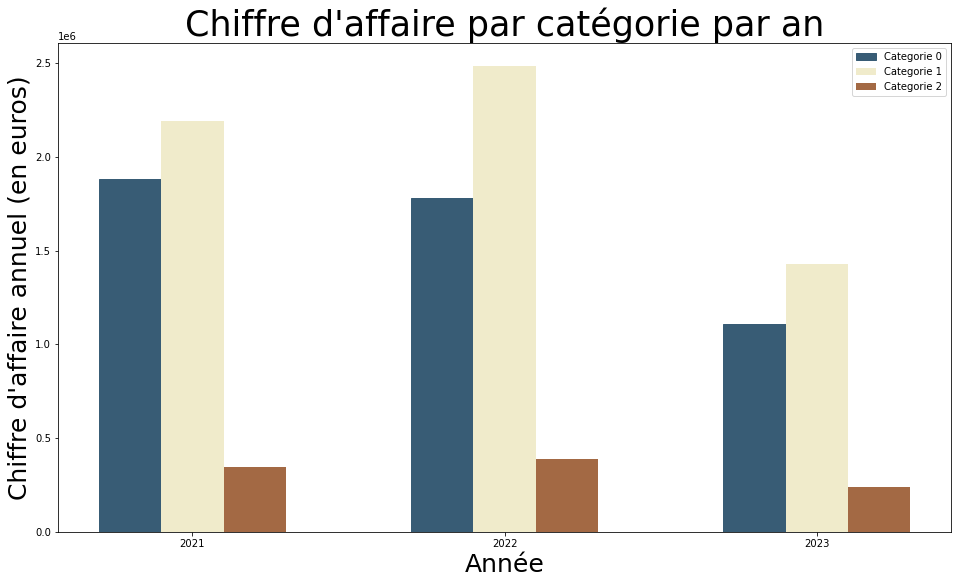

In [76]:
#Graphique du CA par catégorie par an

plt.figure(figsize=(16,9))
w=0.2
x=['2021','2022','2023']
c_2021 = CA_categ_CA.iloc[:,0]
c_2022 = CA_categ_CA.iloc[:,1]
c_2023 = CA_categ_CA.iloc[:,2]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]


plt.bar(bar1,c_2021,w,color="#385C75", label="Categorie 0", edgecolor="#385C75", hatch= "/")
plt.bar(bar2,c_2022,w,color="#F0EBCB",  label="Categorie 1")
plt.bar(bar3,c_2023,w,color="#A36944", label="Categorie 2")
plt.title("Chiffre d'affaire par catégorie par an", fontsize= 35)
plt.xlabel('Année', fontsize = 25)
plt.ylabel("Chiffre d'affaire annuel (en euros)", fontsize = 25)
plt.xticks(bar1+w,x )
plt.legend()
plt.show()

#### Conclusion :

- Le chiffre d'affaire par catégorie suit la même hiérarchie année après année.
- La catégorie 1 génère le plus gros CA, la catégorie 0 suit et la catégorie en 3ème. 
- A noter en 2022 une représentation des CA de la catégorie 1 particulèrement importante

### CA moyen par catégorie 

In [77]:
# Création du pivot table comprenant le CA moyen par an selon les catégorie ainsi que le total

CA_categ_moyen = d_jfi.pivot_table(values = ['CA'],index=['categ'], columns='year')

CA_categ_moyen

CA                
year     2021    2022    2023
categ                        
0      10.639  10.638  10.635
1      20.504  20.470  20.506
2      76.286  76.022  76.957

In [78]:
# Préparation des séries nécessaires pour le graphique

CA_categ_moyen_i = CA_categ_moyen.reset_index()

CA_categ_moyen_CA = CA_categ_moyen.CA

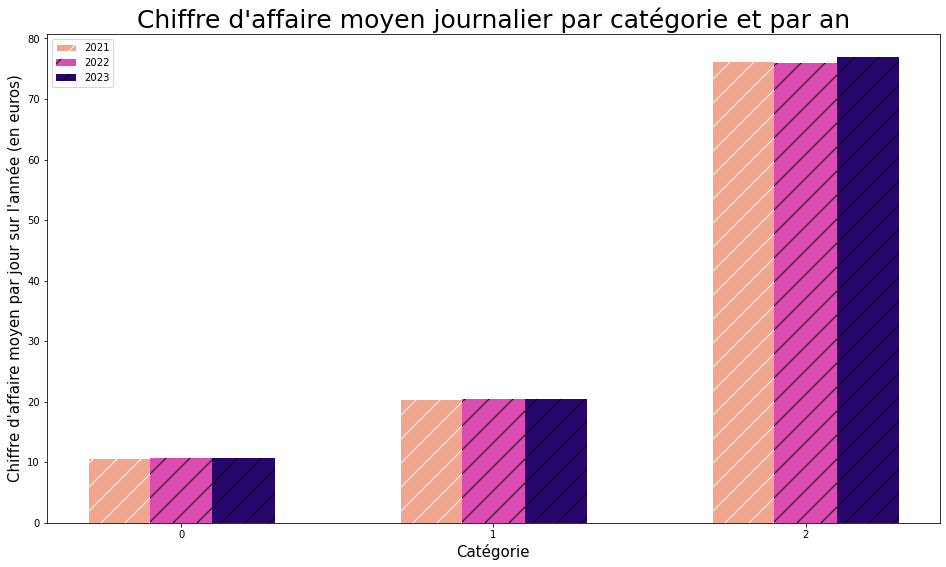

In [79]:
#Graphique du CA moyen par catégorie par an


plt.figure(figsize=(16,9))
w=0.2
x=['0','1','2']
cm_2021 = CA_categ_moyen_CA.iloc[:,0]
cm_2022 = CA_categ_moyen_CA.iloc[:,1]
cm_2023 = CA_categ_moyen_CA.iloc[:,2]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]


plt.bar(bar1,cm_2021,w,color="#F0A58F", label="2021", edgecolor="#FFFFFF",hatch= "/")
plt.bar(bar2,cm_2022,w,color="#DB4CB2",  label="2022",hatch= "/")
plt.bar(bar3,cm_2023,w,color="#29066B", label="2023",hatch= "/")
plt.title("Chiffre d'affaire moyen journalier par catégorie et par an", fontsize= 25)
plt.xlabel('Catégorie', fontsize = 15)
plt.ylabel("Chiffre d'affaire moyen par jour sur l'année (en euros)", fontsize = 15)
plt.xticks(bar1+w,x )
plt.legend()
plt.show()

### Conclusion : 

- Peu d'évolution du CA moyen selon les années 
- En revanche le CA moyen généré par catégorie diffère très fortement selon les catégories

## Le nombre de ventes par catégorie

In [80]:
# Création du pivot table comprenant le nombre de ventes par an selon les catégorie ainsi que le total

vente_categ = d_jfi.pivot_table(values = ['vente'],index=['categ'], columns='year',aggfunc =sum, margins=True)

vente_categ

vente                       
year     2021    2022   2023     All
categ                               
0      176984  206152  32323  415459
1       86716  121412  19041  227169
2       14548   18816   3119   36483
All    278248  346380  54483  679111

### Conclusion :

- L'année 2022 est l'année où les ventes sont les plus importantes (à relativiser avec les périodes prises en compte dans le calcul)
- une Répartition claire des ventes par catégories, 0 puis 1 puis 2

## Répartition du CA entre les clients

- On cherche à sortir une courbe de Lorenz ainsi qu'un coefficient de gini afin de mesurer l'inégalité de repartition du CA entre les clients

In [81]:
# je génère une pivot table avec le CA par client_id 

CA_client = d_jfi.pivot_table(values = ['CA'],index=['client_id'],aggfunc =sum)

# je trie les valeurs par ordre croissant
sort_CA_client = CA_client.sort_values(by="CA")

CA_client_lorenz = sort_CA_client.cumsum()/sort_CA_client.sum()

np_CA_client_lorenz = CA_client_lorenz.to_numpy()

np_CA_client_lorenz= np.insert(np_CA_client_lorenz, 0, 0)

0.5035606941370372


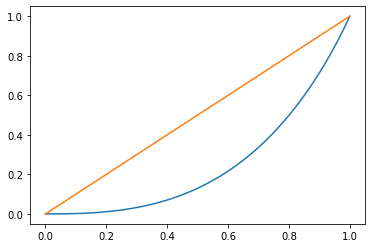

In [82]:
arr = np_CA_client_lorenz

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

### Conclusion :

- On peut voir que la répartition du CA par client est relativement équitable. Indice de gini à 0.50 qui témoigne d'une répartition du CA plutot homogène sans être strictement égalitaire. 
- A noter que les 4 premiers clients dont le CA est bien plus élevé que les autres ne constituent finalement qu'une part marginale du CA total. 

## Répartition du CA entre les produits

- On cherche à avoir la courbe de Lorenz sur les produits 

In [83]:
# je génère une pivot table avec le CA par produit

CA_produit = d_jfi.pivot_table(values = ['CA'],index=['id_prod'],aggfunc =sum)

sort_CA_prod = CA_produit.sort_values(by="CA")

sort_CA_prod_i=sort_CA_prod.reset_index()

sort_CA_prod_i["pourcent_total"]=sort_CA_prod_i['CA']/sort_CA_prod_i['CA'].sum()

CA_prod_lorenz = sort_CA_prod.cumsum()/sort_CA_prod.sum()

np_CA_prod_lorenz = CA_prod_lorenz.to_numpy()

np_CA_prod_lorenz= np.insert(np_CA_prod_lorenz, 0, 0)

0.6902982921012919


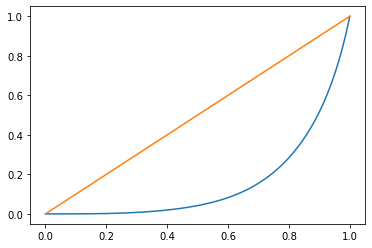

In [84]:
arr = np_CA_prod_lorenz

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

### Conclusion :

- On peut voir que la répartition du CA par produit est plus inégalitaire. 
- Indice de gini à 0.69 qui témoigne d'une certaine concentration du CA autour de quelques références. 
- Références qui ont été listées plus haut 

### Répartition du CA par rapport à l'age des clients

- La courbe de lorenz du CA par rapport à l'age des clients

<AxesSubplot:>

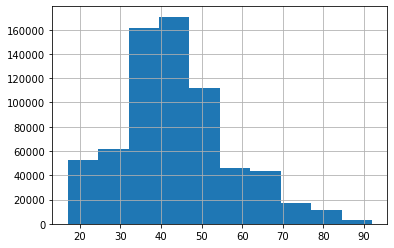

In [85]:
# Création et formatage de la colonne age 
d_jfi['age']=((pd.to_datetime('now'))- (pd.to_datetime(d_jfi['birth'], format= '%Y'))).astype('<m8[Y]')
d_jfi['age']= d_jfi['age'].astype('int')

# distribution des clients selont leur age
d_jfi['age'].hist()

In [86]:
# je génère une pivot table avec le CA par age 

CA_age = d_jfi.pivot_table(values = ['CA'],index=['age'],aggfunc =sum)

sort_CA_age = CA_age.sort_values(by="CA")


CA_age_lorenz = sort_CA_age.cumsum()/sort_CA_age.sum()

np_CA_age_lorenz = CA_age_lorenz.to_numpy()

np_CA_age_lorenz= np.insert(np_CA_age_lorenz, 0, 0)

np_CA_age_lorenz[0], np_CA_age_lorenz[-1]

(0.0, 1.0)

0.5602426968103347


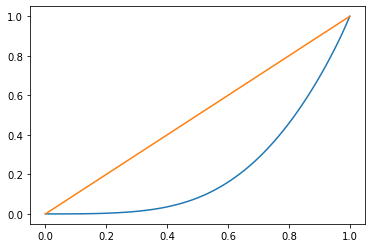

In [87]:
arr = np_CA_age_lorenz

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

### Conclusion :

- On peut voir que la répartition du CA par age est relativement équitable. Indice de gini à 0.56 qui témoigne d'une répartition du CA plutot homogène sans être strictement égalitaire. 
- On ne pas ici véritablement considérer une concentration très forte du CA selon un age en particulier

# Analyse des correlations entre les variables

## Lien entre le genre et la catégorie de livres

- La mise en lumière la dépendance de ces deux variables passe par la réalisation du test statistique du chi2
- Ce test est préconisé pour évaluer la dépendance entre deux variables catégorielles comme c'est ici le cas.
- Je commence par produire le tableau de contingence qui fournit les effectifs de vente selon le sexe et la catégorie
- Je génère ensuite le test

## Tableau de contingence 

In [88]:
cat_sex_cont = pd.crosstab(d_jfi.sex,d_jfi.categ)

In [89]:
cat_sex_cont

categ,0,1,2
sex,,,
f,206103,114899,17283
m,209356,112270,19200


## Test Chi 2

- On pose H0, l'hypothèse nulle d'indépendance des variables
- On pose H1, l'hypothèse alternative de dépendances des variables

Pour un risque de 5% :

Si la p-value obtenue est inférieure à 0.5 on peut alors rejeter l'hypothèse nulle. 

In [90]:
chi2, p,dof,expected = st.chi2_contingency(cat_sex_cont)

In [91]:
print("Chi-Square statistics=", chi2)
print("p_value=", p)
print("expected", expected)

Chi-Square statistics= 147.11906816131497
p_value= 1.1310980597090762e-32
expected [[206952.24759281 113159.50583189  18173.2465753 ]
 [208506.75240719 114009.49416811  18309.7534247 ]]


### Conclusion : 

- Avec une p_value aussi faible, on peut facilement rejetter H0 et accepter H1
- On peut considérer sans trop de risques que les variable catégorie et sexe sont dépendantes.

### Tableau des profils en ligne et en colonne

- Je cherche ici à vérifier la probabilité d'acheter un produit issu de telle ou telle catégorie selon son sexe

In [92]:
pd.crosstab(d_jfi.sex,d_jfi.categ,margins=True,normalize='index')

categ,0,1,2
sex,,,
f,0.609,0.340,0.051
m,0.614,0.329,0.056
All,0.612,0.335,0.054


In [93]:
pd.crosstab(d_jfi.sex,d_jfi.categ,margins=True,normalize='columns')

categ,0,1,2,All
sex,,,,
f,0.496,0.506,0.474,0.498
m,0.504,0.494,0.526,0.502


In [94]:
pd.crosstab(d_jfi.sex,d_jfi.categ,margins=True,normalize='all')

categ,0,1,2,All
sex,,,,
f,0.303,0.169,0.025,0.498
m,0.308,0.165,0.028,0.502
All,0.612,0.335,0.054,1.000


### Conclusion : 

- il ne semble pas y avoir de différence majeure quant à l'achat d'un produit selon son sexe  
- Concrètement, les produits de catégorie 0, 1 ou 2 ne s'adressent pas plus aux hommes qu'aux femmes
- Un produit d'une catégorie donnée a sensiblement le même nombre de chances d'être acheté par un homme que par une femme

## Le lien entre l'age des clients et le montant total des achats

In [95]:
d_jfi['birth']

0         1986
1         1986
2         1986
3         1968
4         1968
          ... 
679106    1945
679107    1945
679108    1945
679109    1993
679110    2003
Name: birth, Length: 679111, dtype: int64

## Lien entre l'age et le CA

- L'age et le chiffre d'affaires sont deux variables quantitatives
- Un lien entres ces deux variables peut être visualisé gràce à un nuage de points pour identifier d'éventuels regroupement. 
- Je choisi pour une représentation plus lisible de discretiser ma variable age avec un regroupement en classe. 
- Le regroupement s'effectue ici en fonction des classes que j'aurais jugées pertinente
- Je procède dans un premier temps à la création d'un nuage de points pour identifier un éventuel lien 
- Je produit ensuite mes classes d'ages 
- je génère mes boites à moustaches selon mes nouvelles classes d'age
- j'effectue un test de spearman pour vérifier le lien entre mes variables

In [96]:
# je crée une pivot table avec le CA et l'age 

pivot_age_montant = d_jfi.pivot_table(['CA'], index = ['age'])

pivot_age_montant = pivot_age_montant.reset_index()

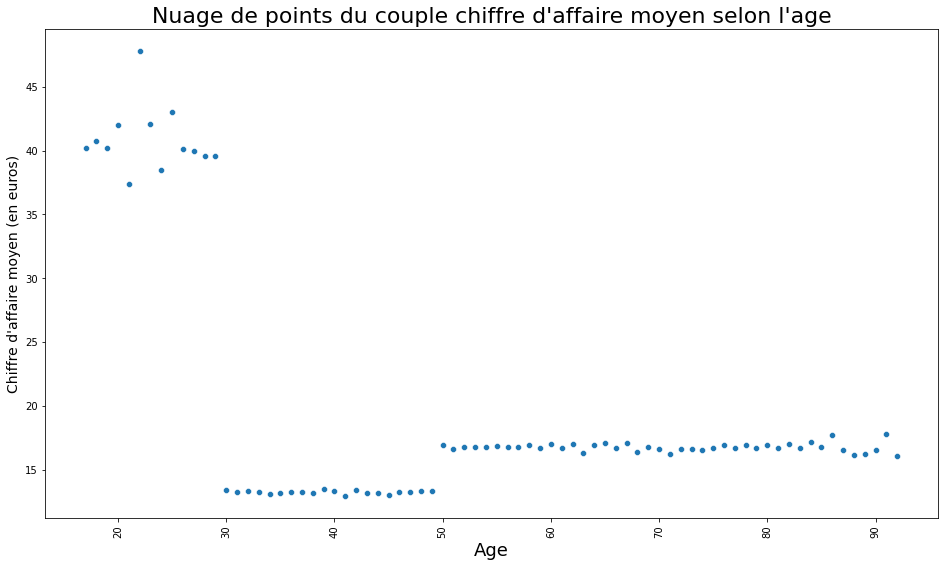

In [97]:
# Nuage de points du couple chiffre d'affaire moyen selon l'age

plt.figure(figsize=(16,9))

sns.scatterplot(data=pivot_age_montant, x="age", y="CA")
plt.title("Nuage de points du couple chiffre d'affaire moyen selon l'age", fontsize= 22)
plt.xlabel("Age", fontsize = 18)
plt.ylabel("Chiffre d'affaire moyen (en euros)", fontsize = 14)
plt.xticks(rotation = 90)

plt.show()

### Conclusion  :

- Visuellement, il apparait un lien entre l'age et le chiffre d'affaire moyen. 
- La classe d'age des 17 - 30 ans ont un CA moyen autour de 40 euros.
- La classe d'age des 30 - 50 ans ont un CA moyen autour de 13 euros.
- La classe d'age des 50 ans et plus ont un CA moyen autour de 17 euros.

Sur ces informations, je construits mes classes d'ages 

In [98]:
# construction des classes d'ages
pivot_age_montant['classe_age']=pd.cut(pivot_age_montant['age'],[17,31,41,51,66,100], right=False)

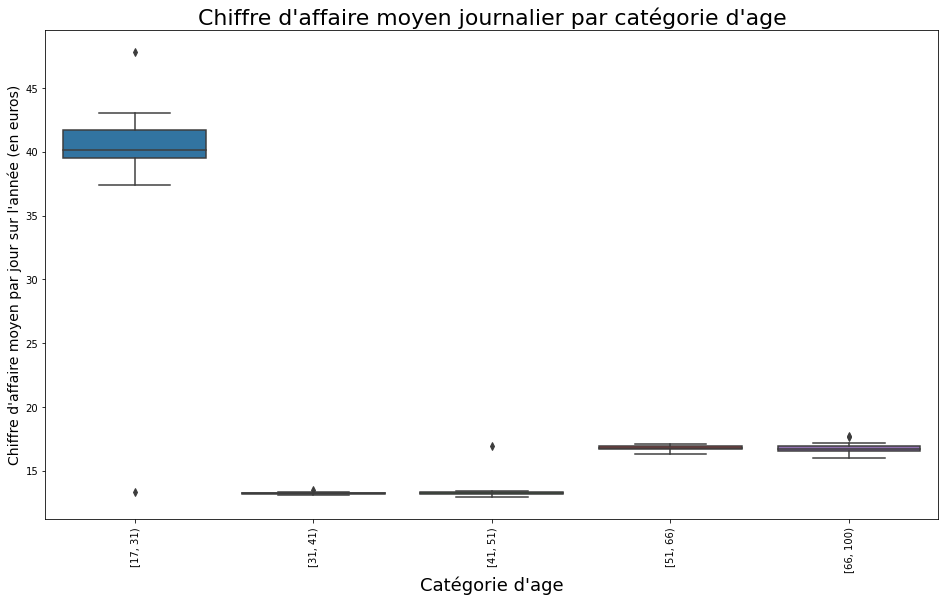

In [99]:
plt.figure(figsize=(16,9))

sns.boxplot(data=pivot_age_montant, x="classe_age", y="CA",whis=2)
plt.title("Chiffre d'affaire moyen journalier par catégorie d'age", fontsize= 22)
plt.xlabel("Catégorie d'age", fontsize = 18)
plt.ylabel("Chiffre d'affaire moyen par jour sur l'année (en euros)", fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

### Conclusion : 

- On voit nettement des différences de CA moyens par catégorie d'age. 
- Visuellement, il apparait un lien entre l'age et le chiffre d'affaire moyen. 
- La classe d'age des 17 - 30 ans ont un CA moyen autour de 40 euros.
- La classe d'age des 30 - 50 ans ont un CA moyen autour de 13 euros.
- La classe d'age des 50 ans et plus ont un CA moyen autour de 17 euros.

A noter la faible variabilité du panier moyen au sein d'une même classe d'age. 
Les profils sont ici facilement identifiables et adoptent des comportements d'achat homogènes.


### Les tests statistiques 

- Peut-on parvenir à demontrer mathématiquement le lien visuel montré plus haut ?

#### Shapiro-Wilk test

- Je cherche à vérifier que l'échantillon suit une distribution gaussienne

les tests supposent que l'échantillon a été tiré d'une distribution gaussienne. Techniquement, cela s'appelle l'hypothèse nulle, ou H0. Un niveau de seuil est choisi appelé alpha, généralement 5% (ou 0,05), qui est utilisé pour interpréter la valeur p.

p <= alpha : rejeter H0, pas normal. p> alpha : échec de rejeter H0, normal. Un résultat supérieur à 5% ne signifie pas que l'hypothèse nulle est vraie. Cela signifie que c'est très probablement vrai compte tenu des preuves disponibles. La valeur p n'est pas la probabilité que les données correspondent à une distribution gaussienne; elle peut être considérée comme une valeur qui nous aide à interpréter le test statistique.

In [100]:
pivot_age_montant0 = d_jfi.pivot_table(['CA'], index = ['age'])

stat, p = st.shapiro(pivot_age_montant0)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.610, p=0.000


#### Conclusion :

- on rejette l'hypothèse nulle, notre échantillon ne suit pas une distribution gaussienne
- Cela signifie que l'on ne pourra pas utiliser le coefficient de pearson qui ne fonctionne que dans le cadre des distribution gaussienne

#### Pearson ou coefficient de corrélation linéaire

- En l'espèce, il n'est pas adapté car notre nuage de point ne présente pas un type de relation qui soit linéaire
- Notre distribution n'est pas gaussienne. 

In [101]:
st.pearsonr(pivot_age_montant.age,pivot_age_montant.CA)

(-0.5478614363790891, 3.019037815858763e-07)

#### Spearman 

Ce test dit non paramétrique est ici plus adapté dans la mesure où la distribution n'est pas gaussienne. 
Le coefficient de corrélation de rang (appelé coefficient de Spearman) examine s'il existe une relation entre le rang des observations pour deux caractères X et Y, ce qui permet de détecter l'existence de relations monotones (croissante ou décroissante), quelle que soit leur forme précise (linéaire, exponentiel, puissance, ...).

In [102]:
st.spearmanr(pivot_age_montant.age,pivot_age_montant.CA)

SpearmanrResult(correlation=-0.08650717703349281, pvalue=0.45745267914381693)

#### Conclusion :

- on rejette l'hypothèse nulle, la p-value inférieure à 0.5 permet de conclure à une relation significative entre nos variables 

## Le lien entre l'age des clients et les catégories des livres

- Je cherche à identifier une relation entre ses deux variables
- J'ai une variable qualitative (catégorie) et une variable quantitative (age)
- Un test Anova semble alors pertinent dans ce cas. 

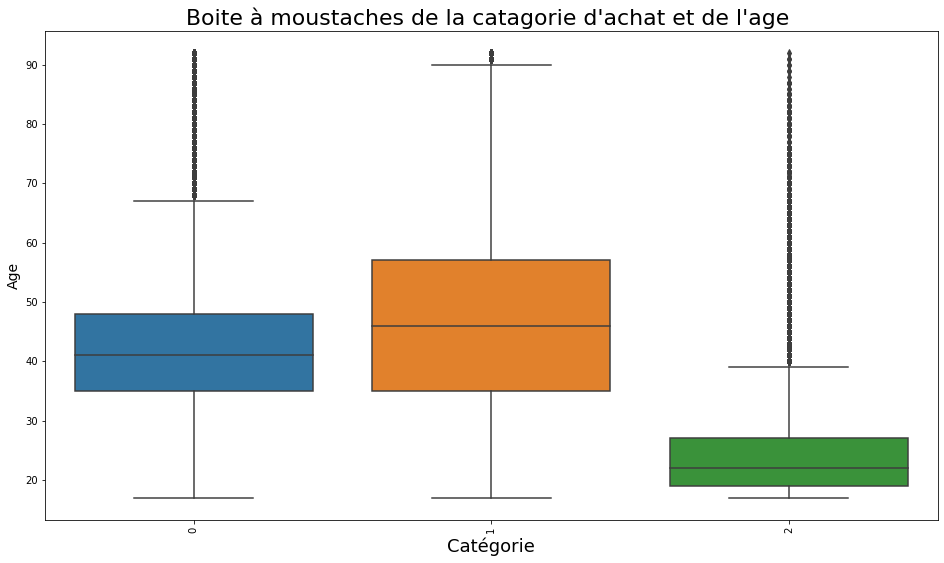

In [103]:
# Je commence par visualiser mes variables avec une boite à moustaches
plt.figure(figsize=(16,9))
sns.boxplot(data=d_jfi, x="categ", y='age')

plt.title("Boite à moustaches de la catagorie d'achat et de l'age ", fontsize= 22)
plt.xlabel("Catégorie", fontsize = 18)
plt.ylabel("Age", fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

### Conclusion : 

- Les individus qui achetent les produits de la catégorie 0 ont une age médian de 41 ans 
- Les individus qui achetent les produits de la catégorie 1 ont une age médian de 48 ans 
- Les individus qui achetent les produits de la catégorie 2 ont une age médian de 23 ans 

Cela explique également pourquoi les jeunes ont un panier moyen plus elevé dans la mesure où il a été montré que la catégorie 2 rassemble des produit dont le prix moyen est significativement pus élevé que ceux des autres catégories

In [104]:
pivot_age_categ1 = d_jfi.pivot_table(values=['CA','age'], index = ['categ'], margins=True)

# Tableau résumé de l'age moyen par catégorie et CA associé 
pivot_age_categ1

,CA,age
categ,,
0,10.638,42.897
1,20.486,46.651
2,76.207,24.948
All,17.455,43.189


In [105]:
d_jfi['classe_age']=pd.cut(d_jfi['age'],[17,31,41,51,66,100], right=False)

In [106]:
pivot_age_categ = d_jfi.pivot_table(['vente'], index = ['classe_age'],columns='categ', aggfunc=len)

In [107]:
pivot_age_categ

vente              
categ            0      1      2
classe_age                      
[17, 31)     29569  33790  33265
[31, 41)    150442  46561    762
[41, 51)    160051  52850    712
[51, 66)     54270  66834   1310
[66, 100)    21127  27134    434

### Tests statistiques

- On cherche à demontrer mathématiquement une relation entre age et la catégorie 
- on teste d'abord la distribution gaussienne via le test Shapiro
- Si il fonctionne on applique le test Anova, dans le cas contraire on applique le Kuskral Wallis plus adapté dans le cas de distributions non gaussiennes


In [108]:
#### Shapiro-Wilk test
pivot_age_categ0 = d_jfi.pivot_table(['categ'], index = ['age'])

stat, p = st.shapiro(pivot_age_categ0)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.807, p=0.000


#### Conclusion 

- La distribution ne suit pas une loi normale 
- on applique le test de Kruskal Wallis

In [109]:
pivot_age_categ[('vente', 0)]

classe_age
[17, 31)      29569
[31, 41)     150442
[41, 51)     160051
[51, 66)      54270
[66, 100)     21127
Name: (vente, 0), dtype: int64

In [110]:
st.kruskal(pivot_age_categ[('vente', 0)],pivot_age_categ[('vente', 1)],pivot_age_categ[('vente', 2)])

KruskalResult(statistic=7.340000000000003, pvalue=0.025476469946680968)

#### Conclusion
L’hypothèse nulle  Ho : « toutes les categories sont vendues de manière similaire selon la catégorie d'age» et l’hypothèse alternative H1 : « L'une des catégorie de vend plus ou moins selon l'age».

-> On peut ici rejeter aisément H0 et conclure que l'age influe sur le choix d'acheter une catégorie plutot qu'une autre. 

source : https://datascientest.com/3-exemples-pour-comprendre-les-tests-statistiques-non-parametriques

## Le lien entre l'age et la fréquence d'achat

- Je commence par créer un nouveau df comprenant la fréquence d'achat 
- J'ai deux variables quantitative, je produits un test de correlation linaire si distribution normale sinon test de spearman

#### Calcul de la fréquence d'achat

In [111]:
#Tri de ma table d'analyses par client et datetime
df_client_datetime = d_jfi.sort_values(by=['client_id','datetime'])

#calcul de la colonne fréquence achat qui prend la qui soustrait le datetime de la ligne précédende et 
#lui fourni un résultat calculé en jour
df_client_datetime['frequence_achat'] = df_client_datetime.groupby(['client_id'])['datetime'].diff().dt.days

# df de la fréquence d'achat par age 
df_age_frequence = df_client_datetime.pivot_table(values='frequence_achat',index='age')

df_age_frequence['age']= df_age_frequence.index

df_age_frequence

,frequence_achat,age
age,,
17,18.285,17
18,20.974,18
19,19.822,19
20,18.931,20
21,18.906,21
...,...,...
88,13.343,88
89,12.977,89
90,16.289,90


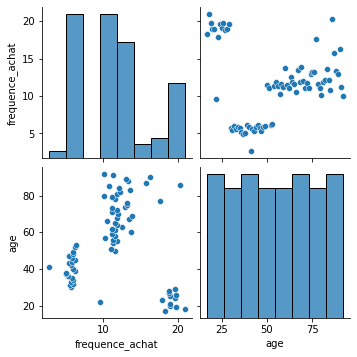

In [112]:
# Je visualise mes variables via un pair plot

sns.pairplot(data= df_age_frequence)

plt.show()

### Conclusion :

- La distribution des variables ne semble pas suivre une loi normale
- La fréquence d'achat est plus élevée (20 jours) et relativement homogène pour les individus dont l'age se situe entre 17 et 30 ans
- La fréquence d'achat est plus faible (5 jours)  pour les individus dont l'age se situe entre 17 et 30 ans
- La fréquence d'achat se situe autour de 12 jours pour les individus de 50 ans et plus. 

- Les jeunes achètent moins souvent mais pour plus cher 
- Les 30 - 50 ans achetent pour moins cher mais plus souvent
- A partir de 50 ans, le comportement d'achat est plus varié mais en moyenne un achat toute les deux semaines

### Les tests statistiques

In [113]:
#### Shapiro-Wilk test

stat, p = st.shapiro(df_age_frequence)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.857, p=0.000


#### Conclusion 

- La distribution ne suit pas une loi normale 
- on applique le test de Spearman

In [114]:
#### Spearman

st.spearmanr(df_age_frequence.age,df_age_frequence.frequence_achat)

SpearmanrResult(correlation=0.09000683526999317, pvalue=0.43938727089569984)

#### Conclusion :

- on rejette l'hypothèse nulle, la p-value inférieure à 0.5 permet de conclure à une relation significative entre nos variables

## Relation entre fréquence d'achat et taille du panier moyen 

- Demarche similaire à la partie précédente 
- J'ai deux variables quantitative, je produits un test de correlation linaire si distribution normale sinon test de spearman

In [115]:
df_freq_CA = df_client_datetime.pivot_table(values='CA',index='frequence_achat')

In [116]:
df_freq_CA['frequence_achat']= df_freq_CA.index

In [117]:
df_freq_CA

,CA,frequence_achat
frequence_achat,,
0.000,15.711,0.000
1.000,16.714,1.000
2.000,17.263,2.000
3.000,17.331,3.000
4.000,17.537,4.000
...,...,...
547.000,23.200,547.000
549.000,24.325,549.000
556.000,17.750,556.000


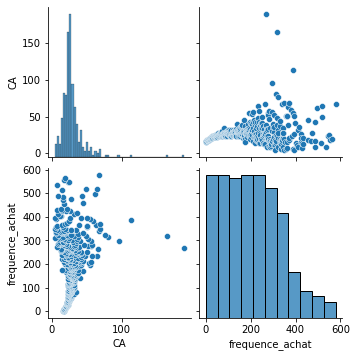

In [118]:
# Je visualise mes variables via un pair plot

sns.pairplot(data= df_freq_CA)

plt.show()

#### Conclusion : 

- Visuellement, il n'apparait pas un véritable patern qui se dégage 
- Difficile de définir une relation linaire entre la fréquence d'achat et le chiffre d'affaire associé. 
- Plus l'attente entre deux achats est élevée et plus le prix du panier moyen semble imprévisible. 
- Pour des fréquences d'achat inférieures à 50 jours les CA sont moins sujets à de fortes dispersions.

### Les tests statistiques 


In [119]:
#### Shapiro-Wilk test

stat, p = st.shapiro(df_freq_CA)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.790, p=0.000


#### Conclusion 

- La distribution ne suit pas une loi normale 
- on applique le test de Spearman

In [120]:
#### Spearman 

st.spearmanr(df_age_frequence.age,df_age_frequence.frequence_achat)

SpearmanrResult(correlation=0.09000683526999317, pvalue=0.43938727089569984)

#### Conclusion :

- Le résultat de spearman induit une faible correlation entre l'age et la fréquence d'achat.

## Matrice de correlation globale 

In [121]:
d_jfi_col = ['price','categ','age']

In [122]:
matrice_corr= d_jfi[d_jfi_col].corr().round(1)

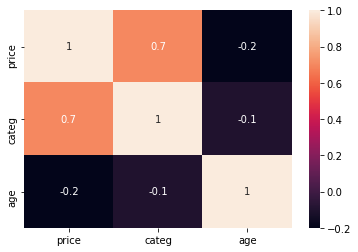

In [123]:
sns.heatmap(data=matrice_corr, annot=True)

plt.show()

## CALCUL PROBA qu'un client achète la ref 0_525 sachant qu'il a acheté la ref 2_159

In [124]:
#Création du pivot table me permettant d'avoir le nombre d'achat d'un produit en particulier par client
df_vente_client = d_jfi.pivot_table('vente',index='client_id',columns = 'id_prod', aggfunc=len, ).reset_index()

In [125]:
#Création d'un nouveau dataframme selectionnant le nombre de ventes des produits 2_159 et 0_525

df_vente_client2= df_vente_client.loc[:,['2_159','0_525']]

In [126]:
# remplacement des valeurs nulles par 0
df_vente_client2.fillna(0, inplace=True)

In [127]:
#Création de la variable Achat_2_159 remplissant la condition suivante. 
# Si un client a acheté au moins une fois la réf 2_159 on écrit 1 sinon on écrit 0.
df_vente_client2['Achat_2_159']= df_vente_client2['2_159'].apply(lambda x: 1 if x > 0 else 0)

In [128]:
#Création de la variable Achat_0_525 remplissant la condition suivante. 
# Si un client a acheté au moins une fois la réf 0_525 on écrit 1 sinon on écrit 0.
df_vente_client2['Achat_0_525']= df_vente_client2['0_525'].apply(lambda x: 1 if x > 0 else 0)

#### Calcul de la probalité conditionnelle 

- On note P_A la probabilité qu'un client achete au moins une fois la référence 2_159
- On note P_B la probabilité qu'un client achète au moins une fois la reférence 0_525

la probabilité de B sachant A se calcule de la manière suivante :
(p(A)×pA(B))/p(A)

In [129]:
PA_2_159 = df_vente_client2.Achat_2_159.sum()/df_vente_client2.Achat_2_159.count()

PB_0_525 =  df_vente_client2.Achat_0_525.sum()/df_vente_client2.Achat_0_525.count()

PA_inter_B = PA_2_159*(df_vente_client2.Achat_0_525.sum()/df_vente_client2.Achat_2_159.sum())

PA_inter_B/PA_2_159

0.8660377358490566

#### Conclusion : 

La probabilité qu'un client achète 0_525 sachant qu'il a déjà acheté 2_159 est de **87%**